<a href="https://colab.research.google.com/github/Guo-bot-1998/Appendicitis/blob/master/Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

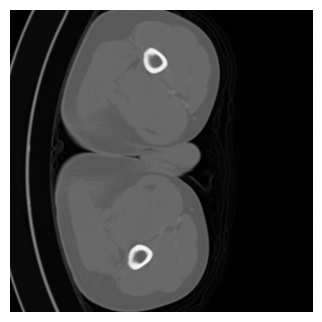

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

import time
# 读取nii文件
nii_file = nib.load('Zx00AD16F8B97A53DE6E7CFE260BDF122F0E655659A3DF1628.nii/Zx00AD16F8B97A53DE6E7CFE260BDF122F0E655659A3DF1628.nii')
mydata = nii_file.get_fdata()

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
current_slice = 0

# Display the first slice
slice_img = plt.imshow(mydata[:, :, current_slice], cmap='gray')
ax.axis('off')
plt.show()

In [ ]:
data = np.append(mydata, mydata,axis=2)

In [ ]:
data.reshape((*data.shape[0:2],data.shape[2]//2 ,2)).shape

(512, 512, 90, 2)

In [ ]:
import nibabel as nib
import numpy as np
import os

In [ ]:
cd drive/MyDrive/Data

/content/drive/MyDrive/Data


In [ ]:
!pwd

/content/drive/MyDrive/Data


In [ ]:
# path/filename: /mnt/data/process_nil_files.py
# Purpose: Traverse directories, find .nil files, and convert them to NumPy arrays


def read_nil_files(directory):
    """
    Traverse directories starting from 'directory', find .nil files,
    and read them into NumPy arrays.
    """
    ncut = 0
    nil_arrays = np.array([])
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.nii'):
                file_path = os.path.join(root, file)
                # Assuming .nil files are in a format that can be read by numpy
                # This needs to be adjusted based on the actual format of .nil files
                nii_file =  nib.load(file_path)
                data = nii_file.get_fdata()
                if nil_arrays.size == 0:
                  nil_arrays = data
                else:
                  nil_arrays = np.append(nil_arrays,  data, axis=2)
                ncut +=  1
    print(ncut)
    return nil_arrays

nil_arrays = read_nil_files(".")

# Printing the keys (file names) of the loaded arrays
print("Loaded .nil files:", list(nil_arrays.shape))


10
Loaded .nil files: [512, 512, 971]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F



class UNet(nn.Module):
    def __init__(self, in_channels):
        super(UNet, self).__init__()

        # Encoder部分
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # 中間部分
        self.middle = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Decoder部分
        self.decoder = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Sigmoid()  # 使用 sigmoid 激活函數
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.middle(x1)
        x3 = self.decoder(x2)
        return x3

# 定義輸入通道數
in_channels = 1  # 因為是黑白圖像，通道數為1

# 建立UNet模型
model = UNet(in_channels)

# 輸出模型結構
print(model)

UNet(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (middle): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(64, 1, kernel_size=(2, 2), stride=(2, 2))
    (5): Sigmoid()
  )
)


In [ ]:
np_array = nil_arrays

np_array_reshaped = np_array.transpose(2, 0, 1).reshape(-1, 1, 512, 512)

# 转换为 Tensor
tensor = torch.from_numpy(np_array_reshaped).float()

In [ ]:
tensor.shape

torch.Size([971, 1, 512, 512])

In [ ]:
tensor[:10,:,:,:].shape

torch.Size([10, 1, 512, 512])

In [ ]:
output = model(tensor[:10,:,:,:])

In [ ]:
output.shape

torch.Size([10, 1, 256, 256])

In [ ]:
output[0,0,:,:]

tensor([[6.6349e-03, 2.7425e-01, 6.8449e-05,  ..., 4.7005e-01, 1.6588e-03,
         1.2246e-03],
        [8.7862e-01, 1.0415e-05, 8.8304e-01,  ..., 1.2213e-08, 1.3265e-02,
         8.3374e-08],
        [8.5124e-01, 9.6366e-01, 2.3355e-02,  ..., 5.1439e-04, 1.1110e-04,
         6.3665e-04],
        ...,
        [1.4519e-01, 1.3376e-07, 4.6897e-03,  ..., 2.1453e-14, 1.0471e-06,
         2.5207e-09],
        [5.5312e-01, 8.8069e-01, 6.4786e-03,  ..., 3.2120e-02, 2.0834e-02,
         9.4970e-01],
        [7.3306e-04, 1.4739e-03, 1.1934e-04,  ..., 1.8336e-06, 2.1025e-05,
         1.8599e-05]], grad_fn=<SliceBackward0>)

array([[5.e-324, 5.e-324],
       [1.e-323, 5.e-324]])